# Part I: Question 1. Divisible by 3

In [72]:
def div_3(N):
    print(f'Printing numbers less than or equal to {N} that are divisible by 3, in reverse order')
    i = N
    while i > 0:
        if i % 3 == 0:
            print(i)
        i -= 1

# test
div_3(51)

N = int(input('Enter the value of N: '))
div_3(N)

Printing numbers less than or equal to 51 that are divisible by 3, in reverse order
51
48
45
42
39
36
33
30
27
24
21
18
15
12
9
6
3
Printing numbers less than or equal to 100 that are divisible by 3, in reverse order
99
96
93
90
87
84
81
78
75
72
69
66
63
60
57
54
51
48
45
42
39
36
33
30
27
24
21
18
15
12
9
6
3


# Part I: Question 2. 100x2 array of random

[[ 1.37967454 -1.40304146]
 [ 2.59252096  0.05807395]
 [ 2.91308186 -1.66385747]
 [ 3.81915026 -0.41925726]
 [ 3.11184765 -1.19970925]]


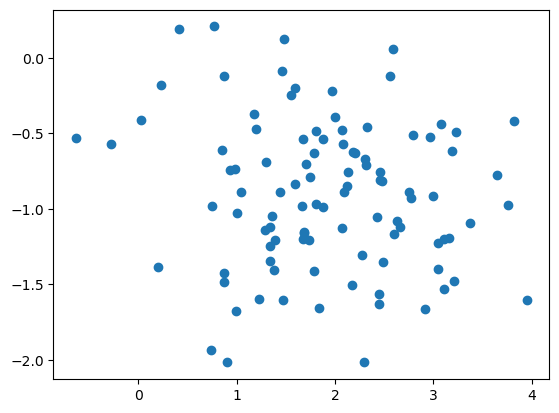

In [73]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.random.normal(2.0, 1.0, size=100)
x2 = np.random.normal(-1.0, 0.5, size=100)

matrix = np.zeros(shape=(100,2))
for i in range(100):
    matrix[i,0] = x1[i]
    matrix[i,1] = x2[i]

print(matrix[:5])

plt.scatter(matrix[:,0], matrix[:,1])
plt.show()


# Part I: Question 3. Pi estimation

In [74]:
import numpy as np
def estimate_pi(n=100):
    inside_circle = 0
    X = np.random.random(size=n)
    Y = np.random.random(size=n)
    for x, y in zip(X, Y):
        r = np.sqrt((x-0.5)**2 + (y-0.5)**2)
        if r < 0.5: inside_circle += 1

    return inside_circle * 4/ n

# test
for n in [int(1e3), int(1e4), int(1e5)]:
    print(f'n={n}, pi={estimate_pi(n)}')


n=1000, pi=3.124
n=10000, pi=3.144
n=100000, pi=3.1408


# Part II. Question 1.

In [75]:
import pandas as pd
import numpy as np

df = pd.read_csv("synthetic_dataset.csv")
#print(df.describe())
print(f'The data set has {len(df)} rows x {len(df.columns)} columns')

for column in ['ID', 'Category', 'Value1', 'Value2', 'Status']:
    print(f'Column {column} has {df[column].isnull().sum()} null values')

rows_with_null = df[df.isnull().any(axis=1)]
print(f'##\nRows with at least one missing value:\n{rows_with_null}')

duplicate_rows = df[df.duplicated()]
print(f'##\nTotal number of duplicate rows: {len(duplicate_rows)}')

print(f'##\nTotal number of rows in the dataframe with duplicates: {len(df)}')
df = df.drop_duplicates()
print(f'##\nTotal number of rows in the dataframe after dropping duplicates: {len(df)}')

df.to_csv("synthetic_dataset_cleaned.csv")
print("Saved cleaned dataset to: synthetic_dataset_cleaned.csv")



The data set has 315 rows x 5 columns
Column ID has 0 null values
Column Category has 2 null values
Column Value1 has 2 null values
Column Value2 has 2 null values
Column Status has 2 null values
##
Rows with at least one missing value:
      ID Category  Value1  Value2    Status
94    95      NaN    26.0   40.30    Active
148  149        A     NaN   28.88    Active
180  181        A    95.0   29.91       NaN
206  207        D    61.0     NaN    Active
227  228        B     NaN    2.56  Inactive
241  242        C    66.0    1.13       NaN
258  259        D    78.0     NaN    Active
280  281      NaN    60.0   19.56    Active
##
Total number of duplicate rows: 15
##
Total number of rows in the dataframe with duplicates: 315
##
Total number of rows in the dataframe after dropping duplicates: 300
Saved cleaned dataset to: synthetic_dataset_cleaned.csv


# Part II: Question 2: Exponential distribution sampling

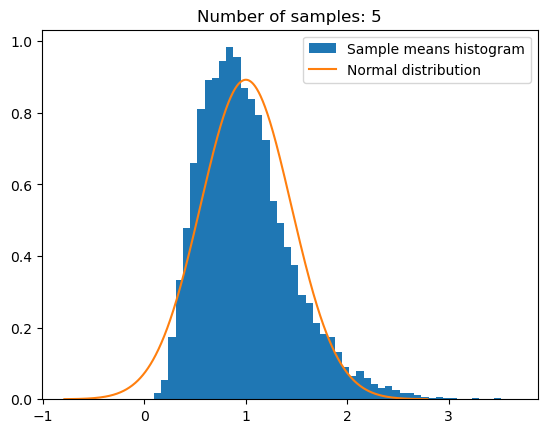

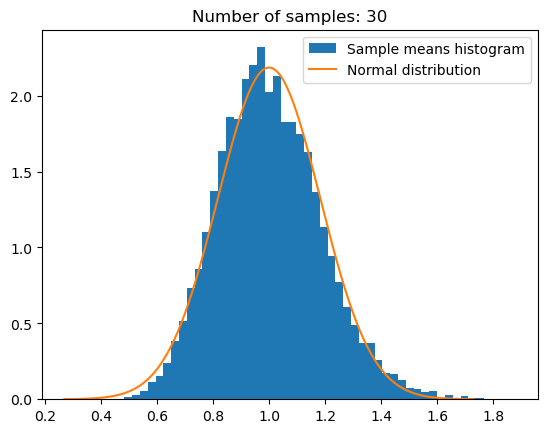

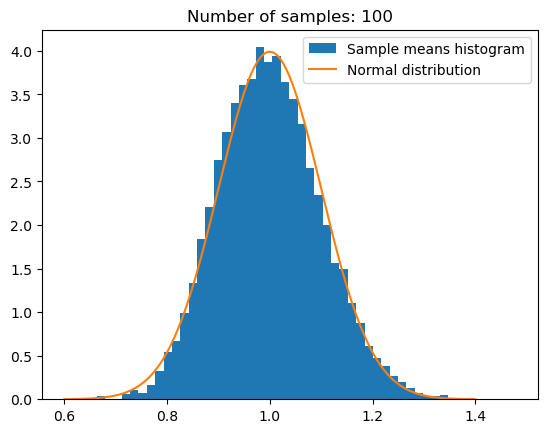

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def distributions(sample_N=30):
    N = 10000
    sample_means = np.zeros(N)

    for i in range(N):
        sample = np.random.exponential(1.0, size=sample_N)
        mean = np.mean(sample)
        sample_means[i] = mean

    pop_mean = 1.0
    pop_std = 1.0
    sigma_x = 1.0 / np.sqrt(sample_N)

    plt.hist(sample_means, density=True, bins=50, label='Sample means histogram')

    # plotting the normal distribution
    x = np.linspace(pop_mean - 4 * sigma_x, pop_mean + 4 * sigma_x, 1000)
    y = norm.pdf(x, pop_mean, sigma_x)
    plt.plot(x, y, label='Normal distribution')
    plt.legend()
    plt.title(f'Number of samples: {sample_N}')
    plt.show()

for s in [5, 30, 100]:
    distributions(s)

### The histogram shape for sample size 5 shows a skewed distribution, clearly distinct from the normal distribution. As we increase the number of samples, the distribution becomes much closer to the normal distribution.

# Part II: Question 3: Statistics of student scores

## TestScoreA ##
Calculated mean=80.46071250000011, numpy mean=80.46071249999999
Calculated median=80.565, numpy median=80.565
Calculated std=4.915236984860826, numpy std=4.915236984860826
Calculated skewness=0.1282625774003521, scipy skewness=0.12826257740043034
Calculated kurtosis=3.1431872831487944, scipy kurtosis=3.1431872831488077


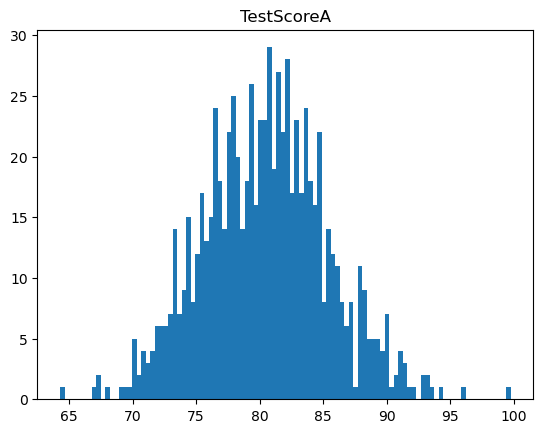

## TestScoreB ##
Calculated mean=76.89978750000004, numpy mean=76.8997875
Calculated median=76.82, numpy median=76.82
Calculated std=8.009691322382139, numpy std=8.009691322382139
Calculated skewness=-0.04777086056254656, scipy skewness=-0.04777086056253056
Calculated kurtosis=2.905769547162702, scipy kurtosis=2.9057695471627003


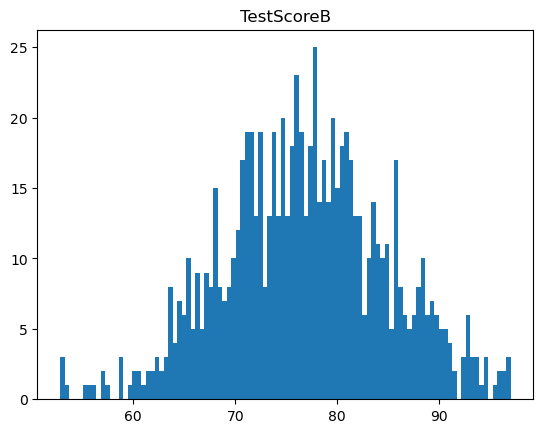

###
## TestScoreA ##
Calculated mean=80.46071250000011, numpy mean=80.46071249999999
Calculated median=80.565, numpy median=80.565
Calculated std=4.915236984860826, numpy std=4.915236984860826
Calculated skewness=0.1282625774003521, scipy skewness=0.12826257740043034
Calculated kurtosis=3.1431872831487944, scipy kurtosis=3.1431872831488077


In [77]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

def mean(samples):
    sum = 0
    for s in samples:
        sum += s
    
    return sum / len(samples)

def median(samples):
    sorted = np.sort(samples)
    if len(samples) % 2 == 0:
        return 0.5 * (sorted[len(samples) // 2] + sorted[(len(samples) // 2) - 1])
    else:
        return sorted[len(samples) // 2]

def std_dev(samples):
    m = mean(samples)
    varsum = 0
    for s in samples:
        varsum += (s - m) ** 2
    
    return np.sqrt(varsum / len(samples))

def skewness(samples):
    m = mean(samples)
    std = std_dev(samples)

    skewsum = 0

    for s in samples:
        skewsum += (s - m)**3
    
    return skewsum / (len(samples) * (std**3))

def kurtosis(samples):
    m = mean(samples)
    std = std_dev(samples)

    kurtsum = 0

    for s in samples:
        kurtsum += (s - m)**4

    return kurtsum / (len(samples) * (std**4))

def print_stats(samples):
    print(f"Calculated mean={mean(samples)}, numpy mean={np.mean(samples)}")
    print(f"Calculated median={median(samples)}, numpy median={np.median(samples)}")
    print(f"Calculated std={std_dev(samples)}, numpy std={np.std(samples)}")
    print(f"Calculated skewness={skewness(samples)}, scipy skewness={stats.skew(samples)}")
    print(f"Calculated kurtosis={kurtosis(samples)}, scipy kurtosis={stats.kurtosis(samples, fisher=False)}")

# test
df = pd.read_csv('student_scores.csv')
print('## TestScoreA ##')
print_stats(df['TestScoreA'])
plt.hist(df['TestScoreA'], bins=100, label='TestScoreA')
plt.title('TestScoreA')
plt.show()
print('## TestScoreB ##')
print_stats(df['TestScoreB'])
plt.hist(df['TestScoreB'], bins=100, label='TestScoreB')
plt.title('TestScoreB')
plt.show()
print('###')
# Manual test
column = ''
score_type = input("Enter the type of score: (A/B): ")
if score_type == 'A':
    column = 'TestScoreA'
    print('## TestScoreA ##')
elif score_type == 'B':
    column = 'TestScoreB'
    print('## TestScoreB ##')

print_stats(df[column])



# Part II: Question 4. Z-test, T-test

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats

def z_test(num_samples=40, feature='TestScoreA', alpha=0.05, tail_type='right'):
    print(f'###\nz_test parameters num_samples={num_samples},  feature={feature}, alpha={alpha}, tail_type={tail_type}')
    df = pd.read_csv('student_scores.csv')

    if feature not in ['TestScoreA', 'TestScoreB']:
        raise ValueError(f'Feature {feature} is invalid. Specify either TestScoreA or TestScoreB')

    data = df[feature]
    pop_mu = np.mean(data)
    pop_std = np.std(data)
    print(f'population mean={pop_mu:.2f}, population std={pop_std:.2f}')
    
    sample = np.random.choice(data, size=num_samples, replace=False)
    sample_mu = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    print(f'sample mean={sample_mu:.2f}, sample std={sample_std:.2f}')
    z_score = (sample_mu - pop_mu)/ (pop_std/np.sqrt(num_samples))
    p_value = scipy.stats.norm.cdf(z_score)
    print(f'T-score={z_score:.2f}, p-value={p_value:.4f}')
    reject_null = False
    if tail_type == 'right' and (1 - p_value) < alpha:
        reject_null = True
    elif tail_type == 'left' and p_value < alpha:
        reject_null = True
    elif tail_type == 'both' and (p_value < alpha/2 or p_value > (1 - alpha/2)):
        reject_null = True
    
    if reject_null:
        print('Reject null hypothesis')
    else:
        print('Failed to reject null hypothesis')


def t_test(num_samples=40, feature='TestScoreA', alpha=0.05, tail_type='right'):
    print(f'###\nt_test parameters num_samples={num_samples}, feature={feature}, alpha={alpha}, tail_type={tail_type}')
    df = pd.read_csv('student_scores.csv')

    if feature not in ['TestScoreA', 'TestScoreB']:
        raise ValueError(f'Feature {feature} is invalid. Specify either TestScoreA or TestScoreB')

    data = df[feature]
    pop_mu = np.mean(data)
    print(f'population mean={pop_mu:.2f}')
    
    sample = np.random.choice(data, size=num_samples, replace=False)
    sample_mu = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    print(f'sample mean={sample_mu:.2f}, sample std={sample_std:.2f}')
    t_score = (sample_mu - pop_mu)/ (sample_std/np.sqrt(num_samples))
    p_value = scipy.stats.norm.cdf(t_score)
    print(f'T-score={t_score:.2f}, p-value={p_value:.4f}')
    reject_null = False
    if tail_type == 'right' and (1 - p_value) < alpha:
        reject_null = True
    elif tail_type == 'left' and p_value < alpha:
        reject_null = True
    elif tail_type == 'both' and (p_value < alpha/2 or p_value > (1 - alpha/2)):
        reject_null = True
    
    if reject_null:
        print('Reject null hypothesis')
    else:
        print('Failed to reject null hypothesis')

# test
"""
t_test(num_samples=40,  feature='TestScoreA', alpha=0.05, tail_type='right')
t_test(num_samples=40, feature='TestScoreA', alpha=0.2, tail_type='right')
t_test(num_samples=40,  feature='TestScoreA', alpha=0.05, tail_type='left')

t_test(num_samples=40, feature='TestScoreA', alpha=0.2, tail_type='left')

t_test(num_samples=40,  feature='TestScoreA', alpha=0.05, tail_type='both')

# below test has very high probability of rejection
t_test(num_samples=10,  feature='TestScoreB', alpha=0.4, tail_type='both')

t_test(num_samples=40,  feature='TestScoreB', alpha=0.05, tail_type='right')

t_test(num_samples=40,  feature='TestScoreB', alpha=0.2, tail_type='right')

t_test(num_samples=40, feature='TestScoreB', alpha=0.05, tail_type='left')

t_test(num_samples=40, feature='TestScoreB', alpha=0.2, tail_type='left')

t_test(num_samples=40,  feature='TestScoreB', alpha=0.05, tail_type='both')
# below test has very high probability of rejection
t_test(num_samples=10, feature='TestScoreB', alpha=0.4, tail_type='both')
"""
print('#'*25)
# test
z_test(num_samples=40, feature='TestScoreA', alpha=0.05, tail_type='right')
"""
z_test(num_samples=40,  feature='TestScoreA', alpha=0.2, tail_type='right')
z_test(num_samples=40,  feature='TestScoreA', alpha=0.05, tail_type='left')

z_test(num_samples=40,feature='TestScoreA', alpha=0.2, tail_type='left')

z_test(num_samples=40,  feature='TestScoreA', alpha=0.05, tail_type='both')

# below test has very high probability of rejection
z_test(num_samples=10,  feature='TestScoreB', alpha=0.4, tail_type='both')

z_test(num_samples=40, feature='TestScoreB', alpha=0.05, tail_type='right')

z_test(num_samples=40, feature='TestScoreB', alpha=0.2, tail_type='right')

z_test(num_samples=40,  feature='TestScoreB', alpha=0.05, tail_type='left')

z_test(num_samples=40, feature='TestScoreB', alpha=0.2, tail_type='left')
z_test(num_samples=40,  feature='TestScoreB', alpha=0.05, tail_type='both')
"""

# below test has very high probability of rejection
z_test(num_samples=10,  feature='TestScoreB', alpha=0.4, tail_type='both')


# Manual testing
feature = input('Enter which score (A/B): ')
test_type = input('Enter type of test (Z/T): ')
num_samples = int(input('Enter number of samples: '))
alpha = float(input('Enter the alpha: '))

if test_type == 'Z':
    z_test(num_samples,  f'TestScore{feature}', alpha, tail_type='right')
elif test_type == 'T':
    t_test(num_samples=num_samples,  feature=f'TestScore{feature}', alpha=alpha, tail_type='right')


#########################
###
z_test parameters num_samples=40,  feature=TestScoreA, alpha=0.05, tail_type=right
population mean=80.46, population std=4.92
sample mean=80.04, sample std=5.35
T-score=-0.54, p-value=0.2955
Failed to reject null hypothesis
###
z_test parameters num_samples=10,  feature=TestScoreB, alpha=0.4, tail_type=both
population mean=76.90, population std=8.01
sample mean=78.57, sample std=7.59
T-score=0.66, p-value=0.7447
Failed to reject null hypothesis


###
z_test parameters num_samples=10,  feature=TestScoreB, alpha=0.5, tail_type=right
population mean=76.90, population std=8.01
sample mean=77.04, sample std=6.56
T-score=0.05, p-value=0.5218
Reject null hypothesis
